<img style="float: center;" src='https://github.com/STScI-MIRI/MRS-ExampleNB/raw/main/assets/banner1.png' alt="stsci_logo" width="900px"/> 

<a id="title_ID"></a>
# MIRI MRS Dedicated BG Bad Pixel Update Notebook #

**Author**: David Law, AURA Associate Astronomer, MIRI branch
<br>
**Last Updated**: November 20, 2023
<br>
**Pipeline Version**: 1.12.5
<br>
<br>
**Changes**:<br>

The purpose of this notebook is to use dedicated background exposures taken with a given science program to update the bad pixel mask for the science data.  This can be necessary because the bad pixels change with time, and there may be new bad pixels since the most recent reference file.  Bad pixels are identified by looking for high-valued pixels in the background observations.

This is applied at the 'rate' file stage, and loops over all detector configurations.

<hr style="border:1px solid gray"> </hr>

1.<font color='white'>-</font>Configuration <a class="anchor" id="intro"></a>
------------------

In [1]:
# Set parameters to be changed here.
# It should not be necessary to edit cells below this in general unless modifying the correction.

# Directory containing science rate files
sci_dir = 'data/Obs03/stage1/'

# Directory containing background rate files
bg_dir = 'data/Obs03/stage1/'

# Flagging threshold
flagthresh=99.9 # Percentile level above which to flag

# Overwrite old rate files?  (If FALSE, will write out to _ratesub.fits files)
overwrite=False

<hr style="border:1px solid gray"> </hr>

2.<font color='white'>-</font>Imports and setup <a class="anchor" id="import"></a>
------------------

In [2]:
from astropy.io import fits
import numpy as np
import glob
import matplotlib.pyplot as plt
from stcal import dqflags
from jwst import datamodels
from jwst.assign_wcs import AssignWcsStep as awcs

In [3]:
# Set the DO_NOT_USE bit value
dnubit=dqflags.interpret_bit_flags('DO_NOT_USE',mnemonic_map=datamodels.dqflags.pixel)

<hr style="border:1px solid gray"> </hr>

3.<font color='white'>-</font>Apply correction<a class="anchor" id="apply"></a>
------------------

MIRIFUSHORT SHORT
Nscifiles = 2
Nbgfiles = 2


2023-11-20 13:52:20,578 - stpipe.AssignWcsStep - INFO - AssignWcsStep instance created.
2023-11-20 13:52:20,611 - stpipe.AssignWcsStep - INFO - Step AssignWcsStep running with args ('data/Obs03/stage1/jw04489001001_07101_00001_mirifushort_rate.fits',).
2023-11-20 13:52:20,611 - stpipe.AssignWcsStep - INFO - Step AssignWcsStep parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'sip_approx': True, 'sip_max_pix_error': 0.1, 'sip_degree': None, 'sip_max_inv_pix_error': 0.1, 'sip_inv_degree': None, 'sip_npoints': 12, 'slit_y_low': -0.55, 'slit_y_high': 0.55}
2023-11-20 13:52:21,035 - stpipe.AssignWcsStep - INFO - Applied Barycentric velocity correction : 0.9999642371705103
2023-11-20 13:52:21,761 - stpipe.AssignWcsStep - INFO - Created a MIRI mir_mrs pipeline with references {'

Flagging above  5.161909264927635 DN/s


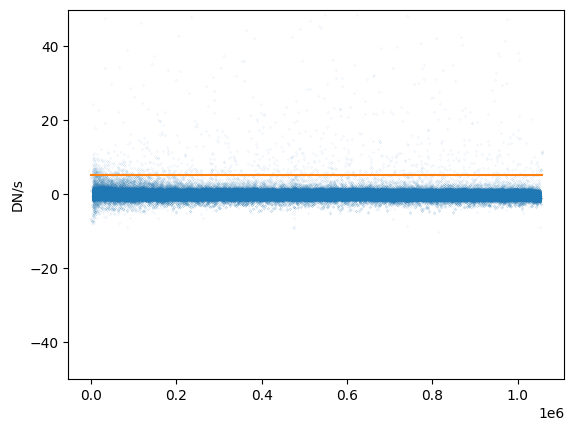

MIRIFUSHORT MEDIUM
Nscifiles = 2
Nbgfiles = 2


2023-11-20 13:52:23,039 - stpipe.AssignWcsStep - INFO - AssignWcsStep instance created.
2023-11-20 13:52:23,095 - stpipe.AssignWcsStep - INFO - Step AssignWcsStep running with args ('data/Obs03/stage1/jw04489001001_05101_00001_mirifushort_rate.fits',).
2023-11-20 13:52:23,096 - stpipe.AssignWcsStep - INFO - Step AssignWcsStep parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'sip_approx': True, 'sip_max_pix_error': 0.1, 'sip_degree': None, 'sip_max_inv_pix_error': 0.1, 'sip_inv_degree': None, 'sip_npoints': 12, 'slit_y_low': -0.55, 'slit_y_high': 0.55}
2023-11-20 13:52:23,528 - stpipe.AssignWcsStep - INFO - Applied Barycentric velocity correction : 0.9999642434410669
2023-11-20 13:52:24,207 - stpipe.AssignWcsStep - INFO - Created a MIRI mir_mrs pipeline with references {'

Flagging above  5.1977624253271175 DN/s


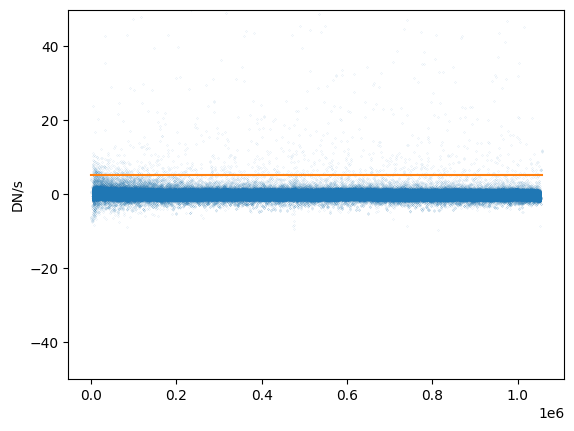

MIRIFUSHORT LONG
Nscifiles = 2
Nbgfiles = 2


2023-11-20 13:52:25,480 - stpipe.AssignWcsStep - INFO - AssignWcsStep instance created.
2023-11-20 13:52:25,557 - stpipe.AssignWcsStep - INFO - Step AssignWcsStep running with args ('data/Obs03/stage1/jw04489001001_03101_00001_mirifushort_rate.fits',).
2023-11-20 13:52:25,557 - stpipe.AssignWcsStep - INFO - Step AssignWcsStep parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'sip_approx': True, 'sip_max_pix_error': 0.1, 'sip_degree': None, 'sip_max_inv_pix_error': 0.1, 'sip_inv_degree': None, 'sip_npoints': 12, 'slit_y_low': -0.55, 'slit_y_high': 0.55}
2023-11-20 13:52:25,996 - stpipe.AssignWcsStep - INFO - Applied Barycentric velocity correction : 0.999964250378704
2023-11-20 13:52:26,698 - stpipe.AssignWcsStep - INFO - Created a MIRI mir_mrs pipeline with references {'d

Flagging above  5.15660452166862 DN/s


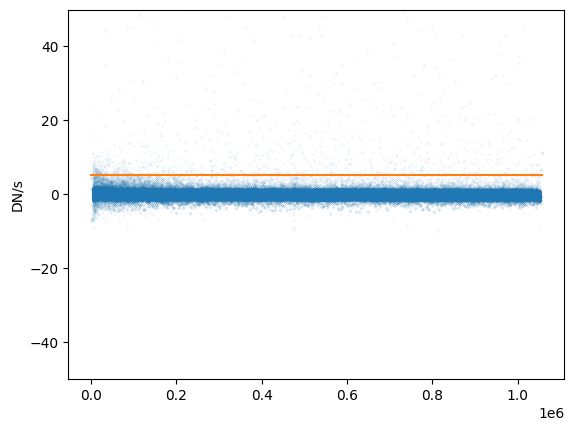

MIRIFULONG SHORT
Nscifiles = 2
Nbgfiles = 2


2023-11-20 13:52:28,094 - stpipe.AssignWcsStep - INFO - AssignWcsStep instance created.
2023-11-20 13:52:28,203 - stpipe.AssignWcsStep - INFO - Step AssignWcsStep running with args ('data/Obs03/stage1/jw04489001001_07101_00001_mirifulong_rate.fits',).
2023-11-20 13:52:28,204 - stpipe.AssignWcsStep - INFO - Step AssignWcsStep parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'sip_approx': True, 'sip_max_pix_error': 0.1, 'sip_degree': None, 'sip_max_inv_pix_error': 0.1, 'sip_inv_degree': None, 'sip_npoints': 12, 'slit_y_low': -0.55, 'slit_y_high': 0.55}
2023-11-20 13:52:28,591 - stpipe.AssignWcsStep - INFO - Applied Barycentric velocity correction : 0.9999642371705103
2023-11-20 13:52:29,093 - stpipe.AssignWcsStep - INFO - Created a MIRI mir_mrs pipeline with references {'d

Flagging above  3.7409737411603396 DN/s


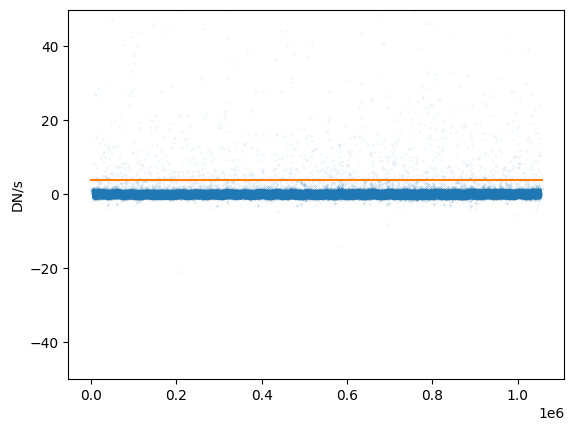

MIRIFULONG MEDIUM
Nscifiles = 2
Nbgfiles = 2


2023-11-20 13:52:30,237 - stpipe.AssignWcsStep - INFO - AssignWcsStep instance created.
2023-11-20 13:52:30,354 - stpipe.AssignWcsStep - INFO - Step AssignWcsStep running with args ('data/Obs03/stage1/jw04489001001_05101_00001_mirifulong_rate.fits',).
2023-11-20 13:52:30,355 - stpipe.AssignWcsStep - INFO - Step AssignWcsStep parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'sip_approx': True, 'sip_max_pix_error': 0.1, 'sip_degree': None, 'sip_max_inv_pix_error': 0.1, 'sip_inv_degree': None, 'sip_npoints': 12, 'slit_y_low': -0.55, 'slit_y_high': 0.55}
2023-11-20 13:52:30,732 - stpipe.AssignWcsStep - INFO - Applied Barycentric velocity correction : 0.9999642434410669
2023-11-20 13:52:31,228 - stpipe.AssignWcsStep - INFO - Created a MIRI mir_mrs pipeline with references {'d

Flagging above  3.744496475581296 DN/s


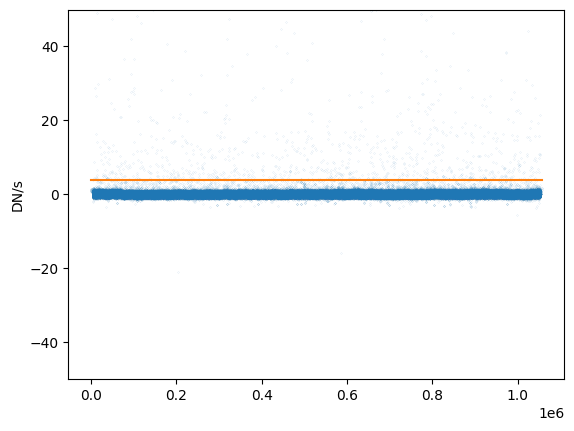

MIRIFULONG LONG
Nscifiles = 2
Nbgfiles = 2


2023-11-20 13:52:32,596 - stpipe.AssignWcsStep - INFO - AssignWcsStep instance created.
2023-11-20 13:52:32,650 - stpipe.AssignWcsStep - INFO - Step AssignWcsStep running with args ('data/Obs03/stage1/jw04489001001_03101_00001_mirifulong_rate.fits',).
2023-11-20 13:52:32,651 - stpipe.AssignWcsStep - INFO - Step AssignWcsStep parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'sip_approx': True, 'sip_max_pix_error': 0.1, 'sip_degree': None, 'sip_max_inv_pix_error': 0.1, 'sip_inv_degree': None, 'sip_npoints': 12, 'slit_y_low': -0.55, 'slit_y_high': 0.55}
2023-11-20 13:52:33,038 - stpipe.AssignWcsStep - INFO - Applied Barycentric velocity correction : 0.999964250378704
2023-11-20 13:52:33,538 - stpipe.AssignWcsStep - INFO - Created a MIRI mir_mrs pipeline with references {'di

Flagging above  3.8122530771312064 DN/s


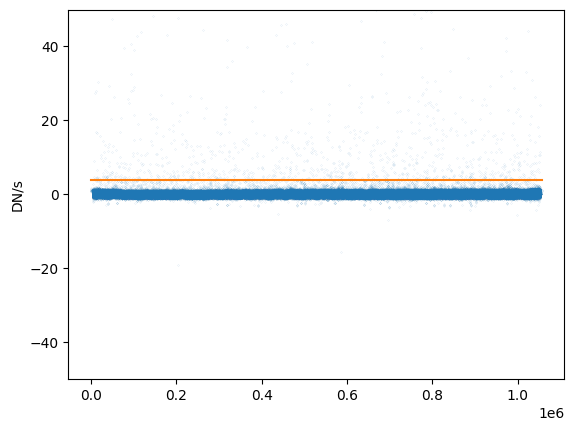

In [4]:
# Loop over the six detector/band combinations
detvals=np.array(['MIRIFUSHORT','MIRIFULONG'])
bandvals=np.array(['SHORT','MEDIUM','LONG'])

for det in detvals:
    for bandstr in bandvals:
        print(det,bandstr)
        scifiles=np.array(sorted(glob.glob(sci_dir+'*rate.fits')))
        bgfiles=np.array(sorted(glob.glob(bg_dir+'*rate.fits')))

        # Ensure using only appropriate band
        nscifiles=len(scifiles)
        keep=np.zeros(nscifiles)
        for ii in range(0,nscifiles):
            hdu=fits.open(scifiles[ii])
            hdr=hdu[0].header
            if ((hdr['DETECTOR'] == det)&(hdr['BAND'] == bandstr)):
                keep[ii]=1
        indx=(np.where(keep == 1))[0]
        scifiles=scifiles[indx]
        nscifiles=len(scifiles)
        print('Nscifiles =',nscifiles)

        # Ensure using only appropriate band
        nbgfiles=len(bgfiles)
        keep=np.zeros(nbgfiles)
        for ii in range(0,nbgfiles):
            hdu=fits.open(bgfiles[ii])
            hdr=hdu[0].header
            if ((hdr['DETECTOR'] == det)&(hdr['BAND'] == bandstr)):
                keep[ii]=1
        indx=(np.where(keep == 1))[0]
        bgfiles=bgfiles[indx]
        nbgfiles=len(bgfiles)
        print('Nbgfiles =',nbgfiles)
        
        if (nbgfiles > 0):
            # Run assign-wcs on the first file
            model=awcs.call(bgfiles[0])
            basex,basey = np.meshgrid(np.arange(1032),np.arange(1024))
            _,_,lam=model.meta.wcs.transform('detector','world',basex,basey)
            lowch=np.where(lam < np.nanmean(lam))
            highch=np.where(lam > np.nanmean(lam))
        
            bigbg=np.zeros([2,1024,1032])
            for ii in range(0,len(bgfiles)):
                hdu=fits.open(bgfiles[ii])
                dat=hdu['SCI'].data
                bigbg[ii,:,:]=dat
                hdu.close()
        
            # Collapse to create mean
            meanbg=np.nanmedian(bigbg,axis=0)
            
            # Subtract inter-slice pestal dark
            pedestal=np.nanmedian(meanbg[138:911,495:514])
            meanbg=meanbg-pedestal
            
            # Remove average background
            meanbgsub=meanbg.copy()
            xtemp=lam[lowch].ravel()
            ytemp=meanbg[lowch].ravel()
            indx=np.where((np.isfinite(xtemp))&(np.isfinite(ytemp)))
            temp=np.polyfit(xtemp[indx],ytemp[indx],2)
            temp2=np.poly1d(temp)
            yfit=temp2(lam[lowch])
            meanbgsub[lowch]=meanbg[lowch]-yfit
            
            xtemp=lam[highch].ravel()
            ytemp=meanbg[highch].ravel()
            indx=np.where((np.isfinite(xtemp))&(np.isfinite(ytemp)))
            temp=np.polyfit(xtemp[indx],ytemp[indx],2)
            temp2=np.poly1d(temp)
            yfit=temp2(lam[highch])
            meanbgsub[highch]=meanbg[highch]-yfit
            
            # Write out background image
            #hdu=fits.PrimaryHDU(meanbg)
            #hdu.writeto('meanbg.fits',overwrite=True)
            #hdu=fits.PrimaryHDU(meanbgsub)
            #hdu.writeto('meanbgsub.fits',overwrite=True)

            flagval=np.nanpercentile(meanbgsub,flagthresh)
            indx=np.where(meanbgsub > flagval) #Dial percent down to flag more aggressively
            plt.plot(meanbgsub.ravel(),'.',ms=0.1)
            plt.plot([0,len(meanbgsub.ravel())],[flagval,flagval])
            print('Flagging above ',flagval,'DN/s')
            plt.ylim(-50,50)
            plt.ylabel('DN/s')
            plt.show()
        
            # Loop over scifiles
            for file in scifiles:
                hdu=fits.open(file)
                sci=hdu['SCI'].data
                sci[indx]=np.nan
                dq=hdu['DQ'].data
                dq[indx]=np.bitwise_or(dq[indx], dnubit)
                hdu['SCI'].data=sci
                hdu['DQ'].data=dq
                if overwrite:
                    hdu.writeto(file,overwrite=True)
                else:
                    newfile=file.replace('rate.fits','ratesub.fits')
                    hdu.writeto(newfile,overwrite=True)

<hr style="border:1px solid gray"> </hr>

<img style="float: center;" src="https://www.stsci.edu/~dlaw/stsci_logo.png" alt="stsci_logo" width="200px"/> 